## Try 9.5.1: Visualizing the breast cancer dataset.

**The Python code below imports the breast cancer dataset and compares benign and malignant cells using box plots.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Modify the code to explore different features.**

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import and code data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score , accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [85]:
cancer = pd.read_csv('WisconsinBreastCancerDatabase.csv').dropna()
cancer

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [87]:
cancer['Diagnosis'] = cancer['Diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
cancer

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [89]:
from collections import Counter
print(Counter(cancer['Diagnosis']))

Counter({0: 357, 1: 212})


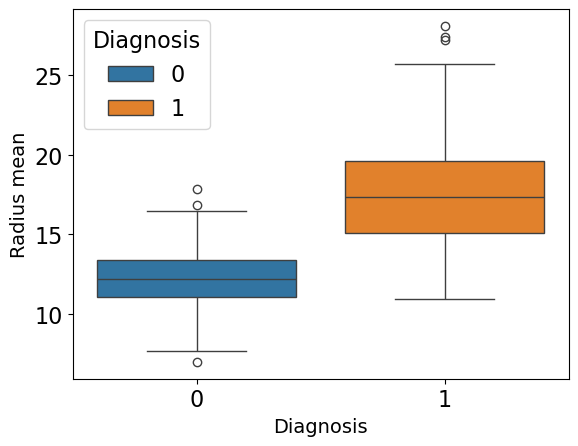

In [91]:
# Plot boxplot
p = sns.boxplot(data=cancer, x='Diagnosis', y='Radius mean', hue='Diagnosis')
p.set_xlabel('Diagnosis', fontsize=14)
p.set_ylabel('Radius mean', fontsize=14)
plt.show()

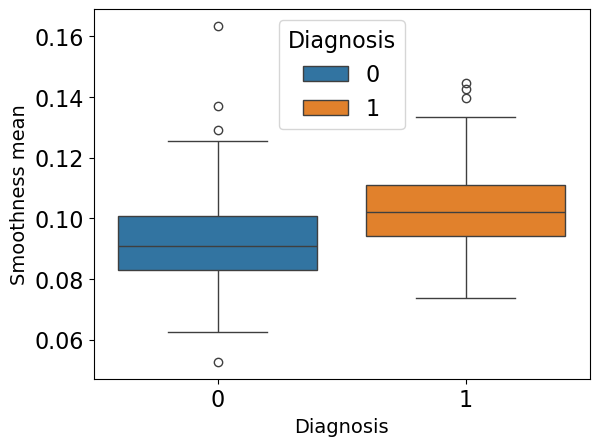

In [93]:
# Plot boxplot
p = sns.boxplot(data=cancer, x='Diagnosis', y='Smoothness mean', hue='Diagnosis')
p.set_xlabel('Diagnosis', fontsize=14)
p.set_ylabel('Smoothness mean', fontsize=14)
plt.show()

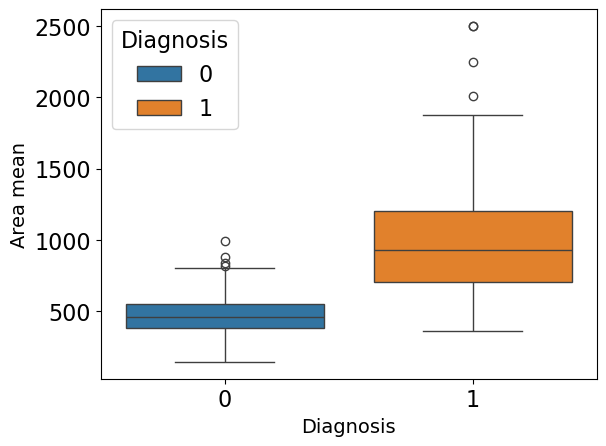

In [95]:
# Plot boxplot
p = sns.boxplot(data=cancer, x='Diagnosis', y='Area mean', hue='Diagnosis')
p.set_xlabel('Diagnosis', fontsize=14)
p.set_ylabel('Area mean', fontsize=14)
plt.show()

## Try 9.5.2: Classifying cells using k-nearest neighbors.

**The Python code below imports the breast cancer dataset and fits k-nearest neighbors for classification with k=3, 7, and 11 to a training dataset.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Modify the code to explore the effect of additional input features or different values of k.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [101]:

cancer

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### The following Participation Activities may have slightly different values due to randomization. Students are encouraged to explore the analysis by changing the seed value, but should answer the PA questions using seed=123.

In [104]:
seed = 123

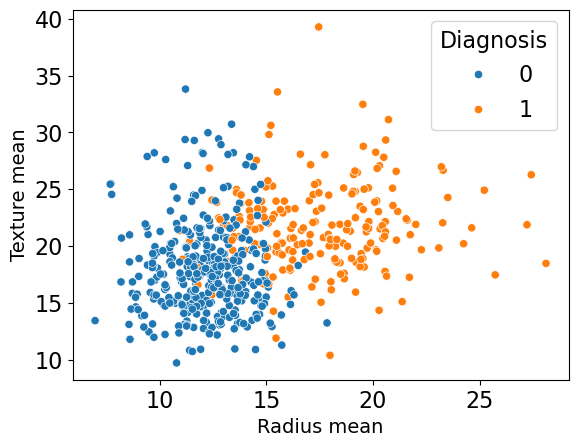

In [106]:
# Visual exploration
p = sns.scatterplot(data=cancer, x='Radius mean', y='Texture mean', hue='Diagnosis')
p.set_xlabel('Radius mean', fontsize=14)
p.set_ylabel('Texture mean', fontsize=14)
plt.show()

In [108]:
# Define input and output features
X = cancer[['Radius mean', 'Texture mean']]
y = cancer[['Diagnosis']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [110]:
# Fit k-nearest neighbors with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

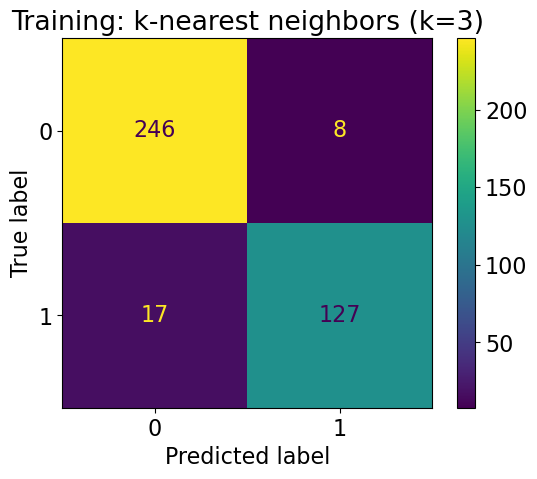

In [113]:
# Confusion matrix
y_pred = knn3.predict(X_train_scaled)

plt.rcParams.update({'font.size': 16})
cmTrain = confusion_matrix(y_train, y_pred)
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=knn3.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: k-nearest neighbors (k=3)')
plt.show()

In [115]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9371859296482412
Precision: 0.9407407407407408
Recall: 0.8819444444444444


In [117]:
# Fit k-nearest neighbors with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

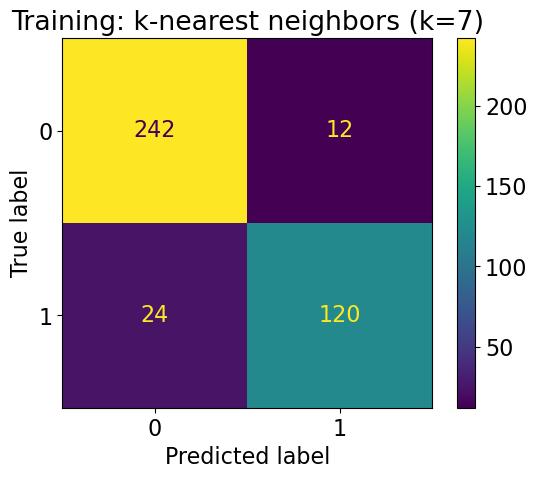

In [120]:
# Confusion matrix
y_pred = knn7.predict(X_train_scaled)

plt.rcParams.update({'font.size': 16})
cmTrain = confusion_matrix(y_train, y_pred)
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=knn7.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: k-nearest neighbors (k=7)')
plt.show()

In [122]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.9095477386934674
Precision: 0.9090909090909091
Recall: 0.8333333333333334


In [124]:
# Fit k-nearest neighbors with k=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train_scaled, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=11)

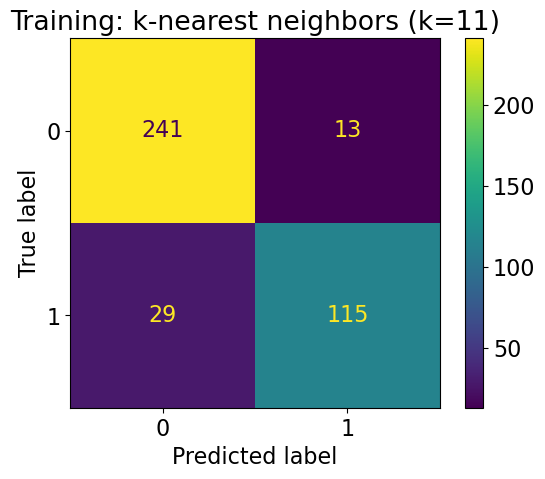

In [127]:
# Confusion matrix
y_pred = knn11.predict(X_train_scaled)

plt.rcParams.update({'font.size': 16})
cmTrain = confusion_matrix(y_train, y_pred)
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=knn11.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: k-nearest neighbors (k=11)')
plt.show()

In [129]:
# Calculate accuracy, precision, and recall
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.8944723618090452
Precision: 0.8984375
Recall: 0.7986111111111112


## Try 9.5.3: Classifying cells using support vector classifiers.

**The Python code below imports the breast cancer dataset and fits three support vector classifiers. Each support vector model uses a different basis function.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below.**
* **Modify the code to explore the effect of additional input features.**

In [ ]:
from sklearn import svm
cancer

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### The following Participation Activities may have slightly different values due to randomization. Students are encouraged to explore the analysis by changing the seed value, but should answer the PA questions using seed=123.

In [136]:
seed=123

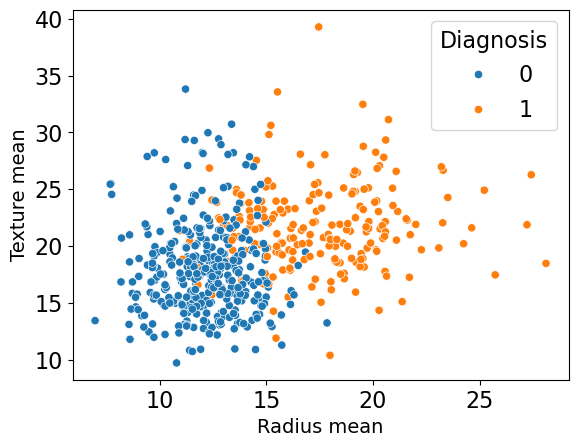

In [138]:
# Visual exploration
p = sns.scatterplot(data=cancer, x='Radius mean', y='Texture mean', hue='Diagnosis')
p.set_xlabel('Radius mean', fontsize=14)
p.set_ylabel('Texture mean', fontsize=14)
plt.show()

In [140]:
# Define input and output features
X = cancer[['Radius mean', 'Texture mean']]
y = cancer[['Diagnosis']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [142]:
# Fit SVM
linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train_scaled, y_train.values.ravel())

SVC(kernel='linear')

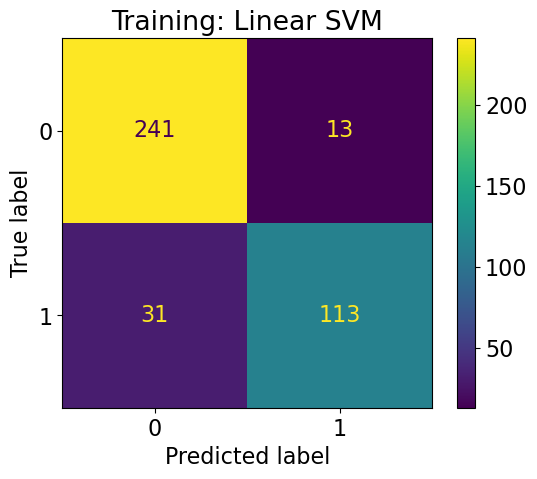

In [145]:
# Confusion matrix
y_pred = linearSVM.predict(X_train_scaled)
cmTrain = confusion_matrix(y_train, y_pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=linearSVM.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: Linear SVM')
plt.show()

In [147]:


# Fit SVM
rbfSVM = svm.SVC(kernel='rbf')
rbfSVM.fit(X_train_scaled, y_train.values.ravel())

SVC()

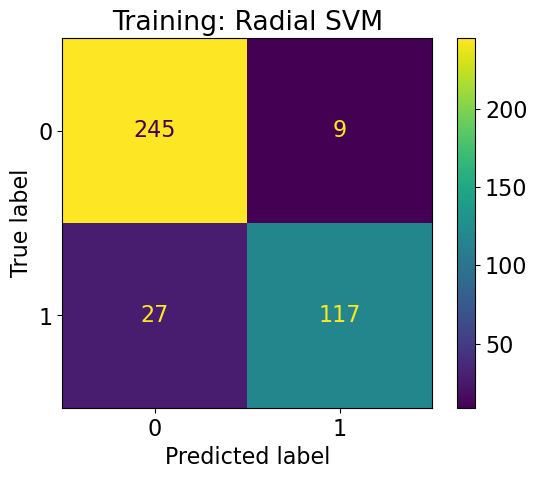

In [150]:
# Confusion matrix
y_pred = rbfSVM.predict(X_train_scaled)
cmTrain = confusion_matrix(y_train, y_pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=rbfSVM.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: Radial SVM')
plt.show()

In [152]:
# Fit SVM
polySVM = svm.SVC(kernel='poly')
polySVM.fit(X_train_scaled, y_train.values.ravel())

SVC(kernel='poly')

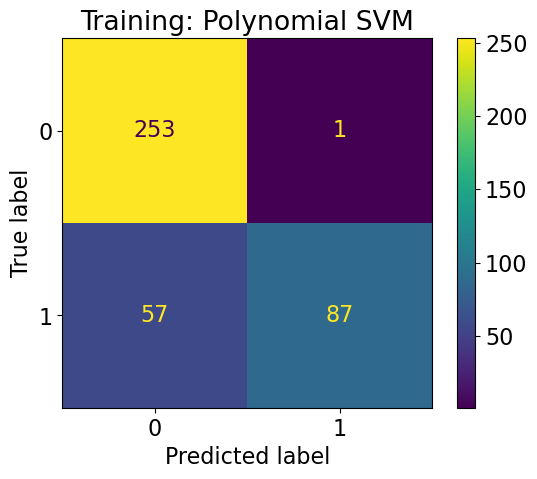

In [155]:
# Confusion matrix
y_pred = polySVM.predict(X_train_scaled)
cmTrain = confusion_matrix(y_train, y_pred)

plt.rcParams.update({'font.size': 16})
cmTrain_plot = ConfusionMatrixDisplay(
    confusion_matrix=cmTrain, display_labels=polySVM.classes_
)
cmTrain_plot.plot()
cmTrain_plot.ax_.set_title('Training: Polynomial SVM')
plt.show()

## Try 9.5.4: Comparing classification models for the breast cancer dataset.

**The Python code below imports the breast cancer dataset, and fits six classification models using all input features.**

* **Click the double-right arrow to restart the kernel and run all cells.**
* **Examine the code below. Compare and contrast training vs. testing accuracy for the six models.**

In [159]:

cancer.shape

(569, 32)

#### The following Participation Activities may have slightly different values due to randomization. Students are encouraged to explore the analysis by changing the seed value, but should answer the PA questions using seed=123.

In [162]:
seed = 123

In [164]:
# Define input and output features
# Remove ID and diagnosis from X
X = cancer.iloc[:, 2:33]
y = cancer[['Diagnosis']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [166]:
y_train.describe()

,Diagnosis
count,398.000000
mean,0.361809
std,0.481129
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [168]:
y_test.describe()

,Diagnosis
count,171.000000
mean,0.397661
std,0.490852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [172]:
# Fit k-nearest neighbors with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_scaled, np.ravel(y_train))

# Fit k-nearest neighbors with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train_scaled, np.ravel(y_train))

# Fit k-nearest neighbors with k=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train_scaled, np.ravel(y_train))

# Fit linear support vector classifier
linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train_scaled, y_train.values.ravel())

# Fit radial support vector classifier
rbfSVM = svm.SVC(kernel='rbf')
rbfSVM.fit(X_train_scaled, y_train.values.ravel())

# Fit polynomial support vector classifier
polySVM = svm.SVC(kernel='poly')
polySVM.fit(X_train_scaled, y_train.values.ravel())

SVC(kernel='poly')

In [175]:
pip install psutil


Note: you may need to restart the kernel to use updated packages.


In [177]:
# Calculate scores on training for all models
train_scores = [
    knn3.score(X_train_scaled, y_train),
    knn7.score(X_train_scaled, y_train),
    knn11.score(X_train_scaled, y_train),
    linearSVM.score(X_train_scaled, y_train),
    rbfSVM.score(X_train_scaled, y_train),
    polySVM.score(X_train_scaled, y_train),
]

train_scores

[0.9798994974874372,
 0.9673366834170855,
 0.964824120603015,
 0.9874371859296482,
 0.9824120603015075,
 0.9120603015075377]

In [180]:
model = ['knn (k=3)', 'knn (k=7)', 'knn (k=11)', 'Linear', 'Radial', 'Polynomial']



# Create a colorful barplot
p = sns.barplot(x=model, y=train_scores, hue=model,palette='husl')  # or try 'husl', 'pastel', etc.

# Labeling
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification Accuracy: Training', fontsize=14)

# Show plot
plt.show()

NameError: name 'models' is not defined

In [182]:
# Calculate scores on testing for all models
test_scores = [
    knn3.score(X_test_scaled, y_test),
    knn7.score(X_test_scaled, y_test),
    knn11.score(X_test_scaled, y_test),
    linearSVM.score(X_test_scaled, y_test),
    rbfSVM.score(X_test_scaled, y_test),
    polySVM.score(X_test_scaled, y_test),
]

test_scores

[0.9883040935672515,
 0.9766081871345029,
 0.9824561403508771,
 0.9883040935672515,
 0.9824561403508771,
 0.8771929824561403]

In [ ]:
# Plot scores on testing for all models
p = sns.barplot(x=model, y=test_scores, hue=model, palette='husl', legend=False)
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: testing', fontsize=16)
plt.show()

In [ ]:
# Calculate recall on training for all models
train_recall = [
    recall_score(y_train, knn3.predict(X_train_scaled)),
    recall_score(y_train, knn7.predict(X_train_scaled)),
    recall_score(y_train, knn11.predict(X_train_scaled)),
    recall_score(y_train, linearSVM.predict(X_train_scaled)),
    recall_score(y_train, rbfSVM.predict(X_train_scaled)),
    recall_score(y_train, polySVM.predict(X_train_scaled)),
]


p = sns.barplot(x=model, y=train_recall, hue=model, palette='husl', legend=False)

p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification recall: training', fontsize=16)
plt.show()

In [ ]:
# Calculate recall on testing for all models
test_recall = [
    recall_score(y_test, knn3.predict(X_test_scaled)),
    recall_score(y_test, knn7.predict(X_test_scaled)),
    recall_score(y_test, knn11.predict(X_test_scaled)),
    recall_score(y_test, linearSVM.predict(X_test_scaled)),
    recall_score(y_test, rbfSVM.predict(X_test_scaled)),
    recall_score(y_test, polySVM.predict(X_test_scaled)),
]


p = sns.barplot(x=model, y=test_recall, hue=model, palette='husl', legend=False)

p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification recall: testing', fontsize=16)
plt.show()

In [ ]:
test_recall